In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
from ydata_profiling import ProfileReport

c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [129]:
from difflib import SequenceMatcher

In [176]:
import seaborn as sns

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [231]:
import numpy as np

In [2]:
# Loading the CSV file as dataframe
data_df = pd.read_csv("./gapminder_final.csv")

# Punto 1. Exploración de los datos

## A) Análisis general de los datos

In [3]:
data_df.shape

(178, 16)

In [4]:
data_df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
2,Central African Rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08


In [5]:
data_df.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate         float64
lifeexpectancy          float64
oilperperson            float64
polityscore             float64
relectricperperson      float64
suicideper100th         float64
employrate              float64
urbanrate               float64
dtype: object

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               178 non-null    object 
 1   incomeperperson       175 non-null    float64
 2   alcconsumption        178 non-null    float64
 3   armedforcesrate       174 non-null    float64
 4   breastcancerper100th  177 non-null    float64
 5   co2emissions          176 non-null    float64
 6   femaleemployrate      177 non-null    float64
 7   hivrate               155 non-null    float64
 8   internetuserate       174 non-null    float64
 9   lifeexpectancy        178 non-null    float64
 10  oilperperson          67 non-null     float64
 11  polityscore           167 non-null    float64
 12  relectricperperson    141 non-null    float64
 13  suicideper100th       178 non-null    float64
 14  employrate            177 non-null    float64
 15  urbanrate             1

In [7]:
data_df.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,175.000000,178.000000,174.000000,177.000000,1.760000e+02,177.000000,155.000000,174.000000,178.000000,67.000000,167.000000,141.000000,178.000000,177.000000,178.000000
mean,7553.392250,6.753539,1.376696,37.615254,5.757754e+09,47.607909,1.854516,34.740125,69.414949,1.432081,3.502994,1181.715476,9.984100,58.854237,56.282135
std,11074.571742,5.139950,1.499729,23.225333,2.734690e+10,14.741347,4.276108,28.088371,9.808335,1.771041,6.423671,1655.388823,6.521086,10.334804,22.561796
min,103.775857,0.030000,0.000000,3.900000,8.506667e+05,12.400000,0.060000,0.210066,47.794000,0.032281,-10.000000,0.000000,0.201449,34.900002,10.400000
25%,609.744287,2.445000,0.491714,20.400000,8.755725e+07,38.799999,0.100000,9.924668,62.725000,0.580038,-2.500000,239.389457,5.785134,51.400002,36.965000
50%,2425.471293,5.920000,0.931293,30.000000,3.054792e+08,48.400002,0.400000,29.939930,72.974000,0.890813,6.000000,614.907287,9.050307,58.799999,59.600000
75%,8880.432039,9.990000,1.601996,50.300000,2.391801e+09,56.000000,1.200000,55.973228,76.127500,1.586422,9.000000,1566.106139,12.409866,65.000000,73.460000
max,52301.587180,23.010000,9.820127,101.100000,3.340000e+11,83.300003,25.900000,95.638113,83.394000,12.228645,10.000000,11154.755030,35.752872,83.199997,100.000000


## B) Análisis univariado

$$
Análisis Income per Person
$$

In [22]:
data_df["incomeperperson"].isnull().sum()

3

In [24]:
data_df[data_df["incomeperperson"].isnull()==True]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
68,Kuwait,NaN,0.10,1.609548,31.8,1.712755e+09,42.0,NaN,38.260234,74.576,6.467568,-7.0,8362.567977,1.498057,65.699997,98.36
100,Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.6,NaN,3.654122,48.673,NaN,0.0,NaN,6.684385,55.700001,24.04
134,Myanmar,NaN,0.58,1.912965,20.2,3.229600e+08,66.5,0.6,NaN,65.193,NaN,-6.0,38.005637,10.114997,74.699997,32.58


[]

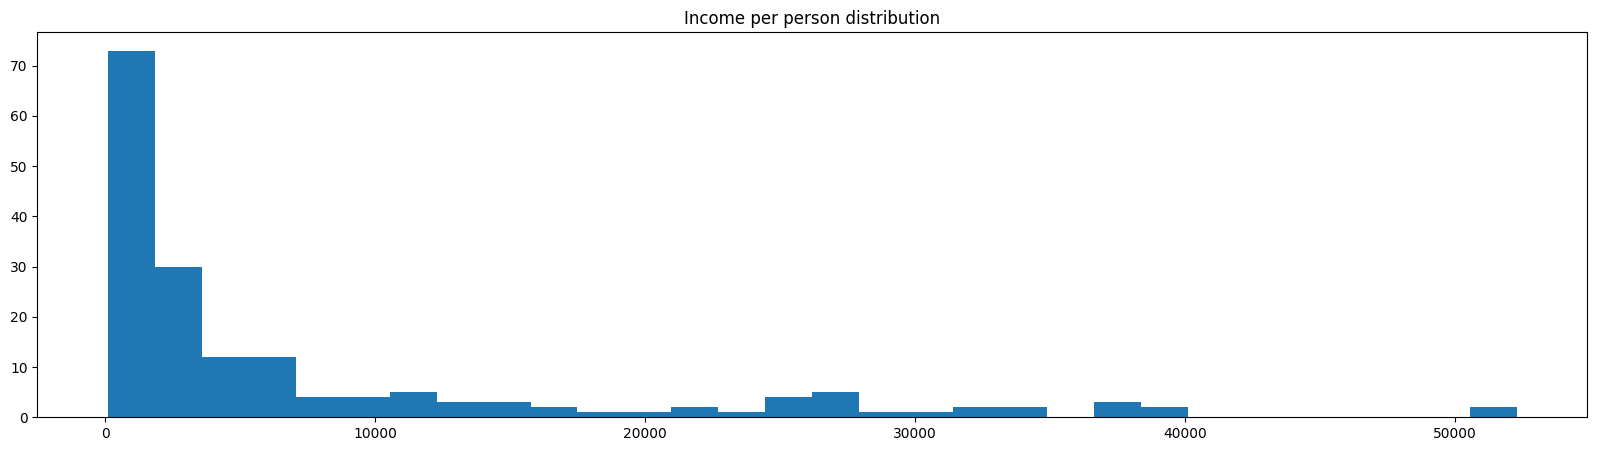

In [13]:
# Plotting a histogram for income per person
plt.figure(figsize=(20, 5))
plt.hist(data_df["incomeperperson"], bins=30)
plt.title("Income per person distribution")
plt.plot()

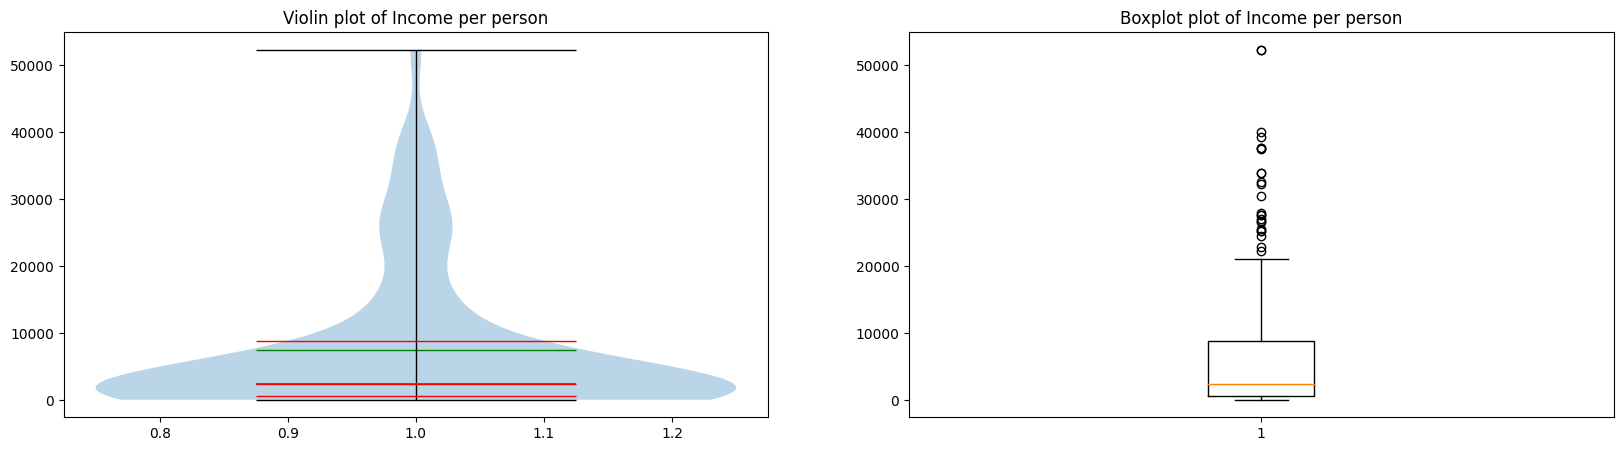

In [45]:
# Plotting a boxplot for number of reviews
sample=data_df[data_df["incomeperperson"].isnull()==False]
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
violin=axs[0].violinplot(sample["incomeperperson"], showmeans = True, showmedians = True, quantiles = [0.25, 0.5, 0.75])
axs[0].set_title("Violin plot of Income per person")
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor("black")
    vp.set_linewidth(1)
vp=violin["cquantiles"]
vp.set_edgecolor("red")
vp.set_linewidth(1)
vp=violin["cmeans"]
vp.set_edgecolor("green")
vp.set_linewidth(1)
axs[1].boxplot(sample["incomeperperson"])
axs[1].set_title("Boxplot plot of Income per person")
plt.show()

$$
Análisis Female employ rate
$$

In [46]:
data_df["femaleemployrate"].isnull().sum()

1

In [47]:
data_df[data_df["femaleemployrate"].isnull()==True]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
127,Djibouti,895.31834,1.87,3.451546,19.5,14054333.33,NaN,2.5,6.497924,57.937,NaN,2.0,NaN,4.993476,NaN,87.3


[]

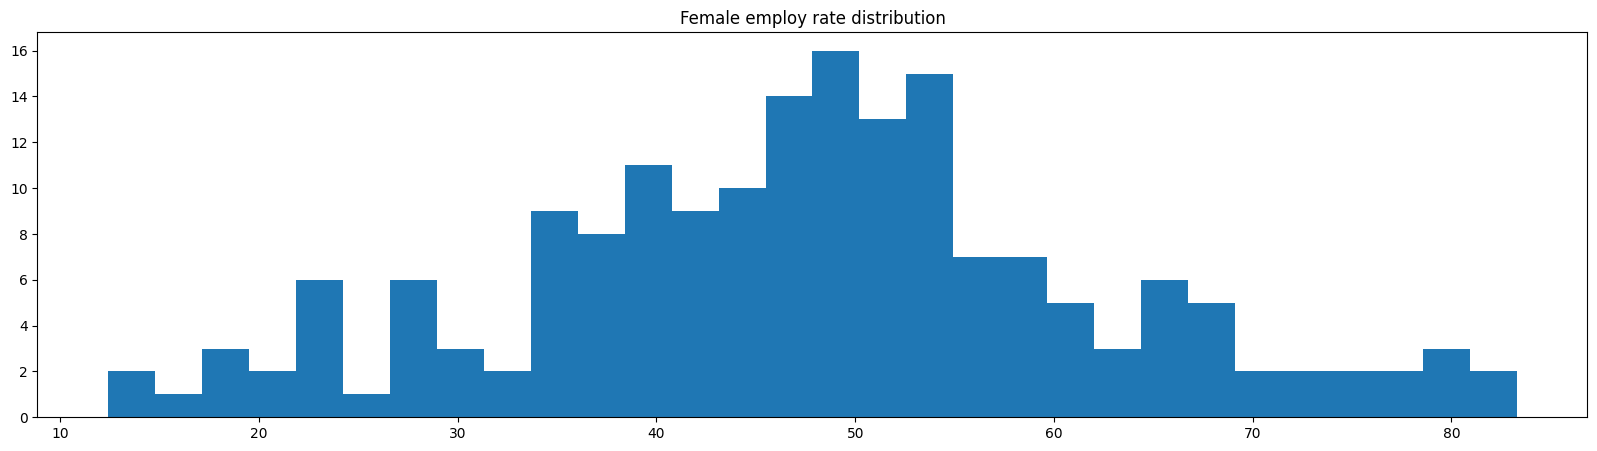

In [48]:
# Plotting a histogram for Female employ rate
plt.figure(figsize=(20, 5))
plt.hist(data_df["femaleemployrate"], bins=30)
plt.title("Female employ rate distribution")
plt.plot()

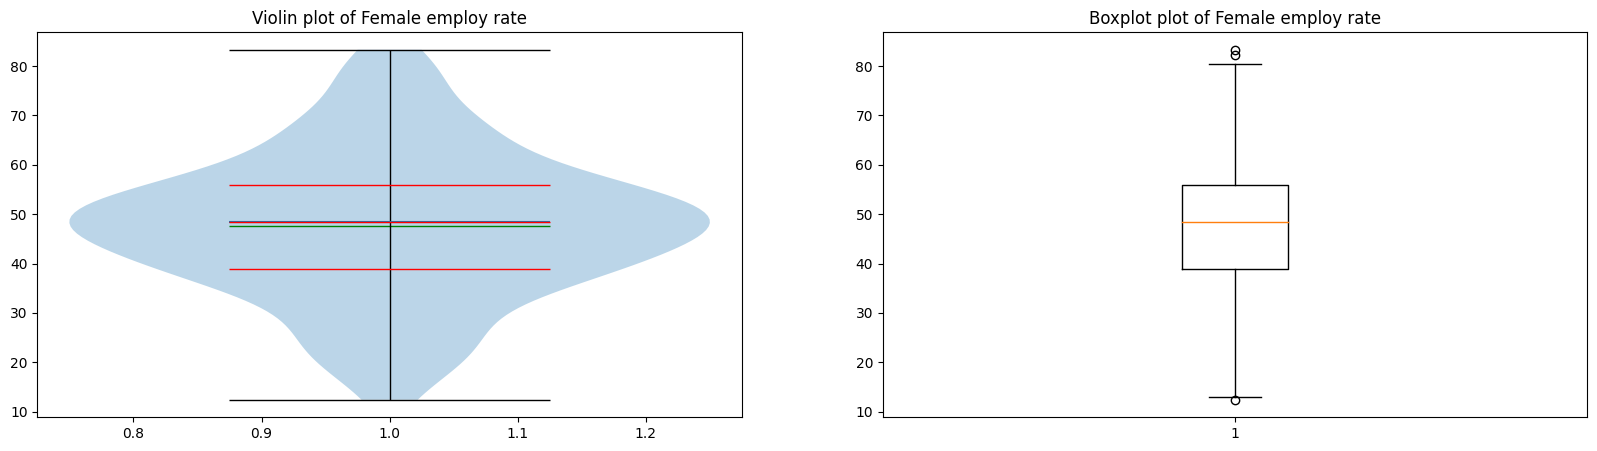

In [49]:
# Plotting a boxplot and violin plot for Female employ rate
sample=data_df[data_df["femaleemployrate"].isnull()==False]
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
violin=axs[0].violinplot(sample["femaleemployrate"], showmeans = True, showmedians = True, quantiles = [0.25, 0.5, 0.75])
axs[0].set_title("Violin plot of Female employ rate")
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor("black")
    vp.set_linewidth(1)
vp=violin["cquantiles"]
vp.set_edgecolor("red")
vp.set_linewidth(1)
vp=violin["cmeans"]
vp.set_edgecolor("green")
vp.set_linewidth(1)
axs[1].boxplot(sample["femaleemployrate"])
axs[1].set_title("Boxplot plot of Female employ rate")
plt.show()

$$
Análisis Internet use rate
$$

In [50]:
data_df["internetuserate"].isnull().sum()

4

In [51]:
data_df[data_df["internetuserate"].isnull()==True]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
98,Sudan,523.950151,2.56,0.969499,22.5,2.250197e+08,27.900000,1.1,NaN,61.452,NaN,-4.0,50.892101,9.709556,47.299999,43.44
111,Sudan,523.950151,2.56,0.969499,22.5,2.250197e+08,27.900000,1.1,NaN,61.452,NaN,-4.0,50.892101,9.709556,47.299999,43.44
123,Sierra Leone,268.331790,9.48,0.523548,28.1,2.975867e+07,63.400002,1.6,NaN,47.794,NaN,7.0,NaN,11.980497,63.799999,37.76
134,Myanmar,NaN,0.58,1.912965,20.2,3.229600e+08,66.500000,0.6,NaN,65.193,NaN,-6.0,38.005637,10.114997,74.699997,32.58


[]

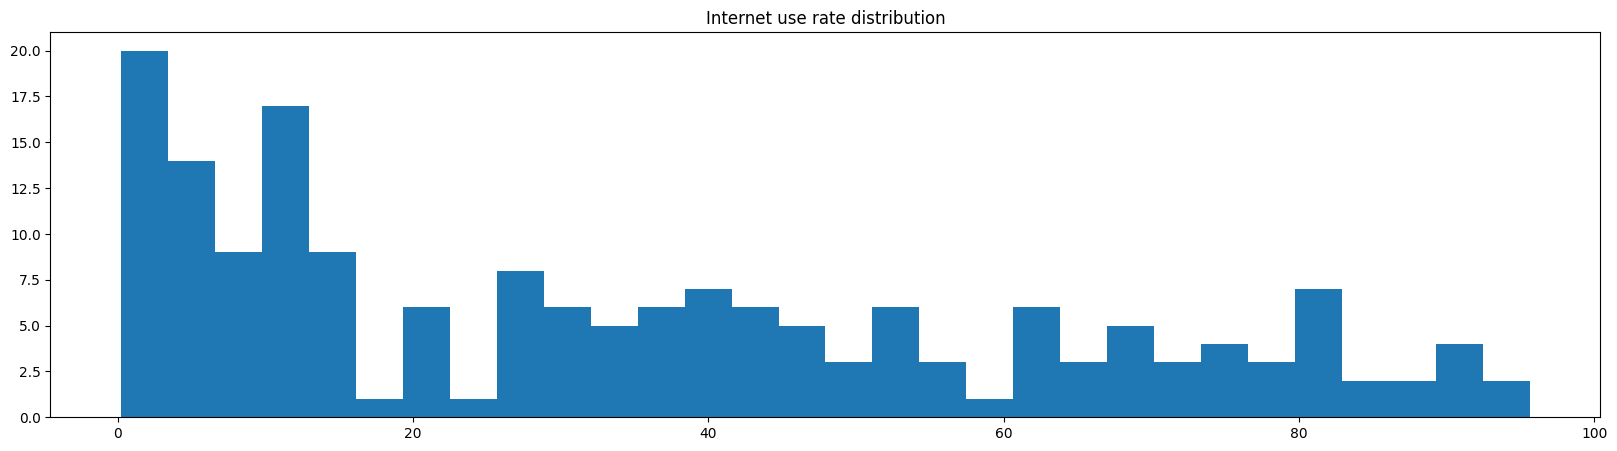

In [52]:
# Plotting a histogram for Internet use rate
plt.figure(figsize=(20, 5))
plt.hist(data_df["internetuserate"], bins=30)
plt.title("Internet use rate distribution")
plt.plot()

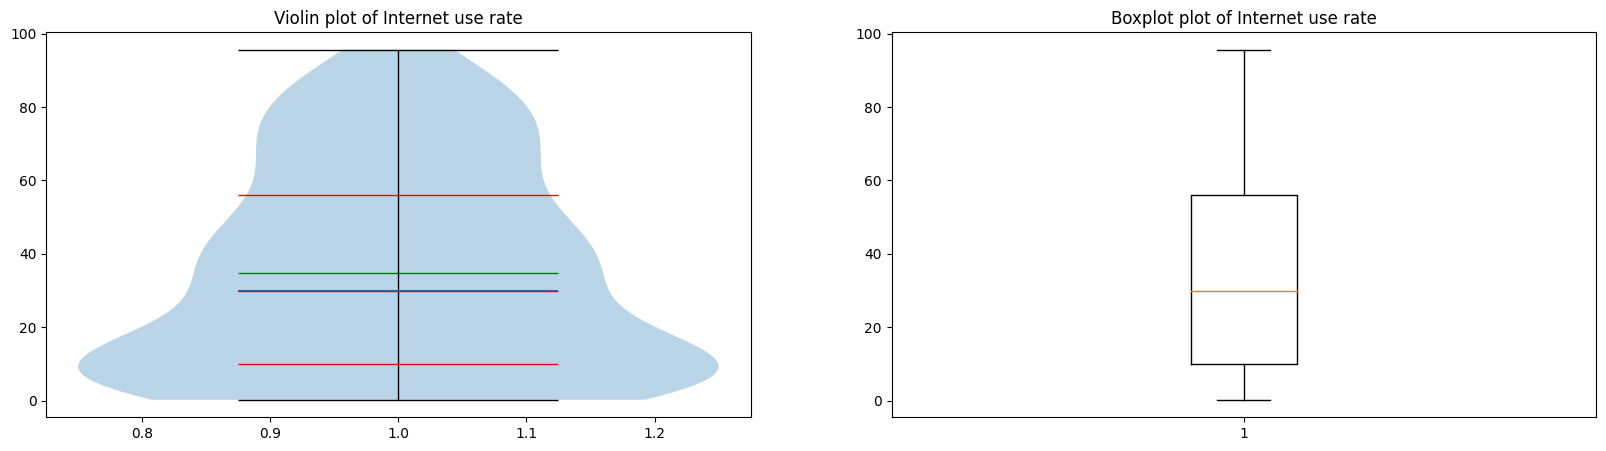

In [53]:
# Plotting a boxplot for Internet use rate
sample=data_df[data_df["internetuserate"].isnull()==False]
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
violin=axs[0].violinplot(sample["internetuserate"], showmeans = True, showmedians = True, quantiles = [0.25, 0.5, 0.75])
axs[0].set_title("Violin plot of Internet use rate")
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor("black")
    vp.set_linewidth(1)
vp=violin["cquantiles"]
vp.set_edgecolor("red")
vp.set_linewidth(1)
vp=violin["cmeans"]
vp.set_edgecolor("green")
vp.set_linewidth(1)
axs[1].boxplot(sample["internetuserate"])
axs[1].set_title("Boxplot plot of Internet use rate")
plt.show()

$$
Análisis  CO2  emissions
$$

In [54]:
data_df["co2emissions"].isnull().sum()

2

In [55]:
data_df[data_df["co2emissions"].isnull()==True]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
28,Lesotho,495.734247,5.56,0.217653,13.1,NaN,49.799999,23.6,3.860565,48.196,NaN,8.0,NaN,7.858619,56.299999,25.46
126,Trinidad and Tobago,10480.817200,6.16,0.581165,51.1,NaN,50.500000,1.5,48.516818,70.124,NaN,10.0,2261.316713,14.547167,61.500000,13.22


[]

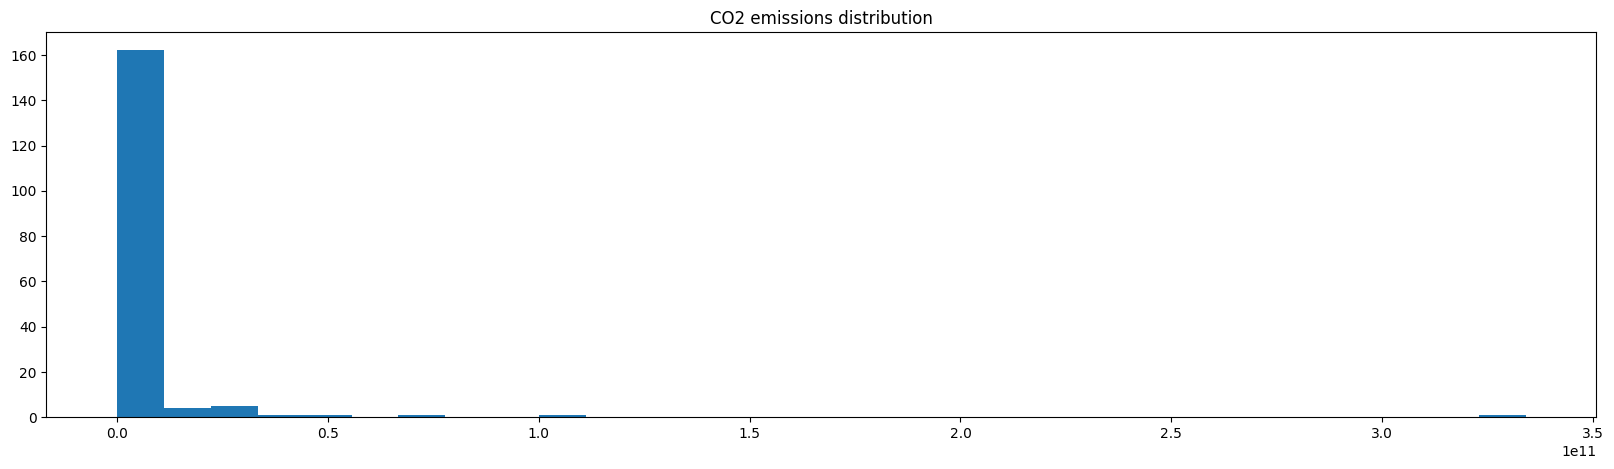

In [56]:
# Plotting a histogram for CO2 emissions
plt.figure(figsize=(20, 5))
plt.hist(data_df["co2emissions"], bins=30)
plt.title("CO2 emissions distribution")
plt.plot()

c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


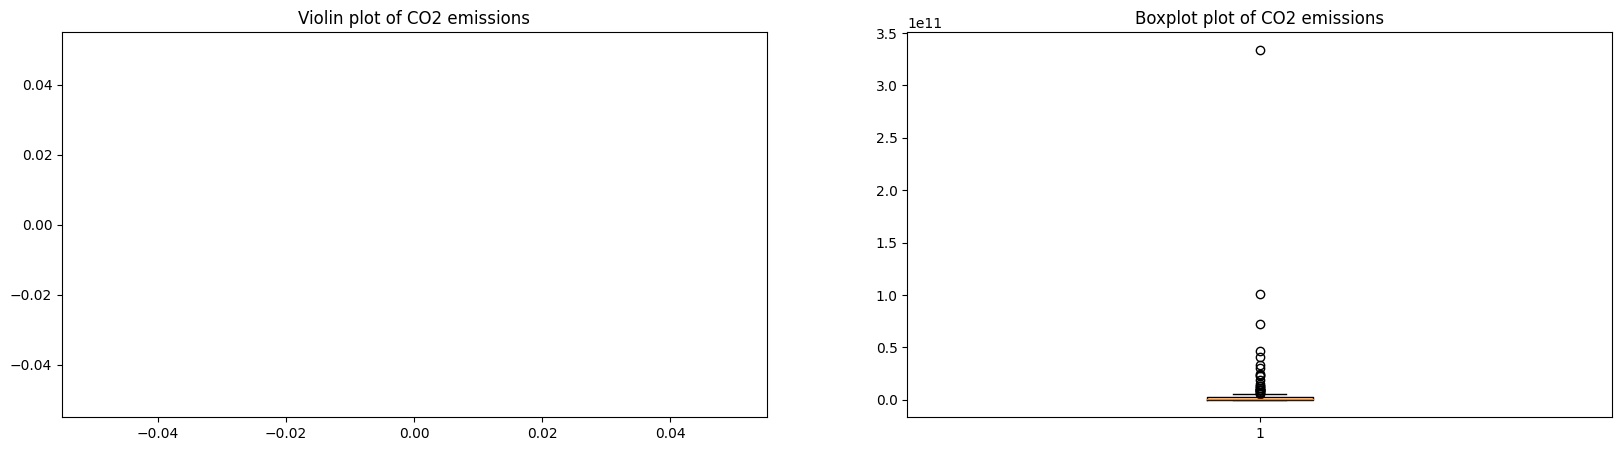

In [57]:
# Plotting a boxplot for CO2 emissions
sample=data_df[data_df["co2emissions"].isnull()==False]
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
violin=axs[0].violinplot(sample["internetuserate"], showmeans = True, showmedians = True, quantiles = [0.25, 0.5, 0.75])
axs[0].set_title("Violin plot of CO2 emissions")
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor("black")
    vp.set_linewidth(1)
vp=violin["cquantiles"]
vp.set_edgecolor("red")
vp.set_linewidth(1)
vp=violin["cmeans"]
vp.set_edgecolor("green")
vp.set_linewidth(1)
axs[1].boxplot(sample["co2emissions"])
axs[1].set_title("Boxplot plot of CO2 emissions")
plt.show()

$$
Análisis Life expectancy
$$

In [58]:
data_df["lifeexpectancy"].isnull().sum()

0

In [59]:
data_df[data_df["lifeexpectancy"].isnull()==True]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate


[]

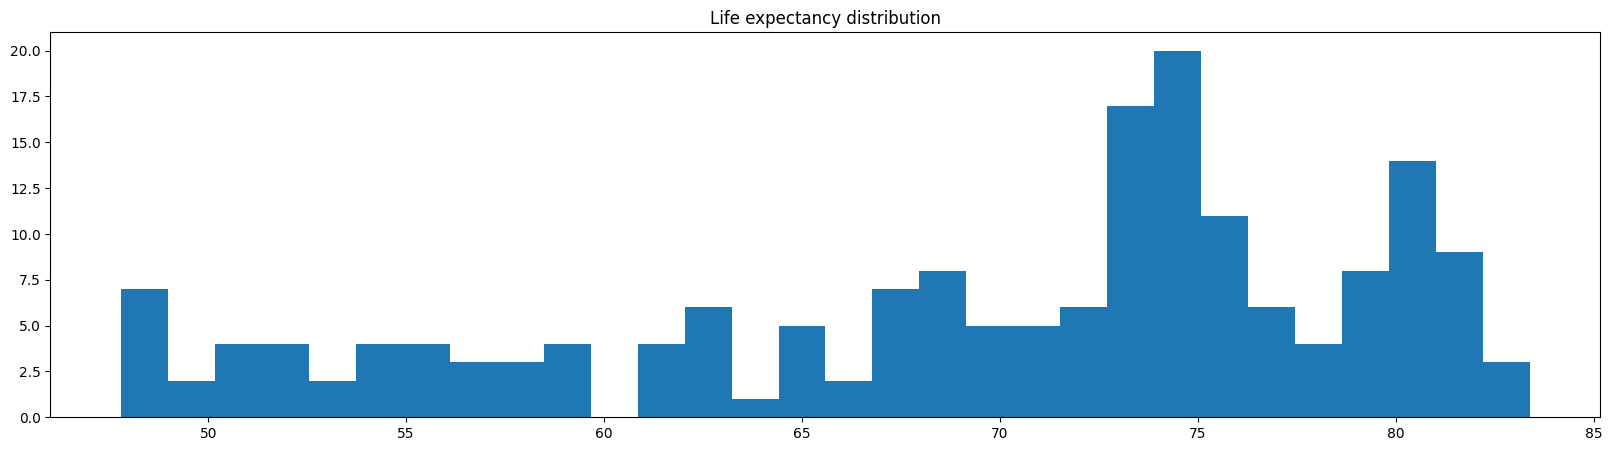

In [60]:
# Plotting a histogram for Life expectancys
plt.figure(figsize=(20, 5))
plt.hist(data_df["lifeexpectancy"], bins=30)
plt.title("Life expectancy distribution")
plt.plot()

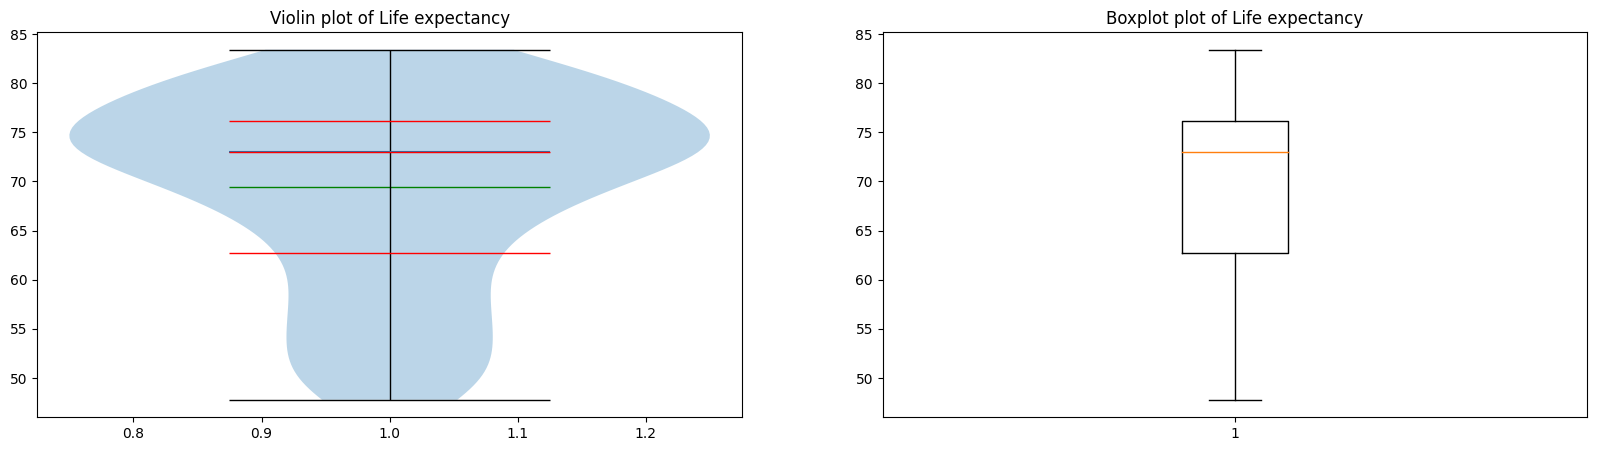

In [61]:
# Plotting a boxplot for Life expectancy
sample=data_df[data_df["lifeexpectancy"].isnull()==False]
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
violin=axs[0].violinplot(sample["lifeexpectancy"], showmeans = True, showmedians = True, quantiles = [0.25, 0.5, 0.75])
axs[0].set_title("Violin plot of Life expectancy")
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor("black")
    vp.set_linewidth(1)
vp=violin["cquantiles"]
vp.set_edgecolor("red")
vp.set_linewidth(1)
vp=violin["cmeans"]
vp.set_edgecolor("green")
vp.set_linewidth(1)
axs[1].boxplot(sample["lifeexpectancy"])
axs[1].set_title("Boxplot plot of Life expectancy")
plt.show()

$$
Análisis Employ rate
$$

In [62]:
data_df["employrate"].isnull().sum()

1

In [63]:
data_df[data_df["employrate"].isnull()==True]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
127,Djibouti,895.31834,1.87,3.451546,19.5,14054333.33,NaN,2.5,6.497924,57.937,NaN,2.0,NaN,4.993476,NaN,87.3


[]

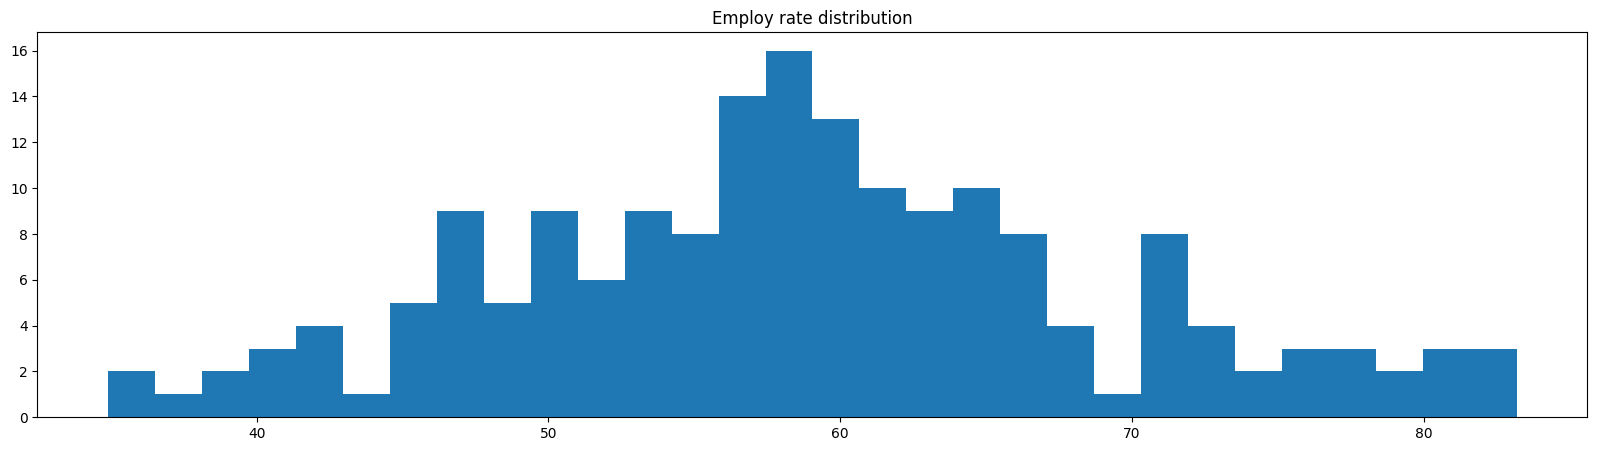

In [64]:
# Plotting a histogram for Employ rate
plt.figure(figsize=(20, 5))
plt.hist(data_df["employrate"], bins=30)
plt.title("Employ rate distribution")
plt.plot()

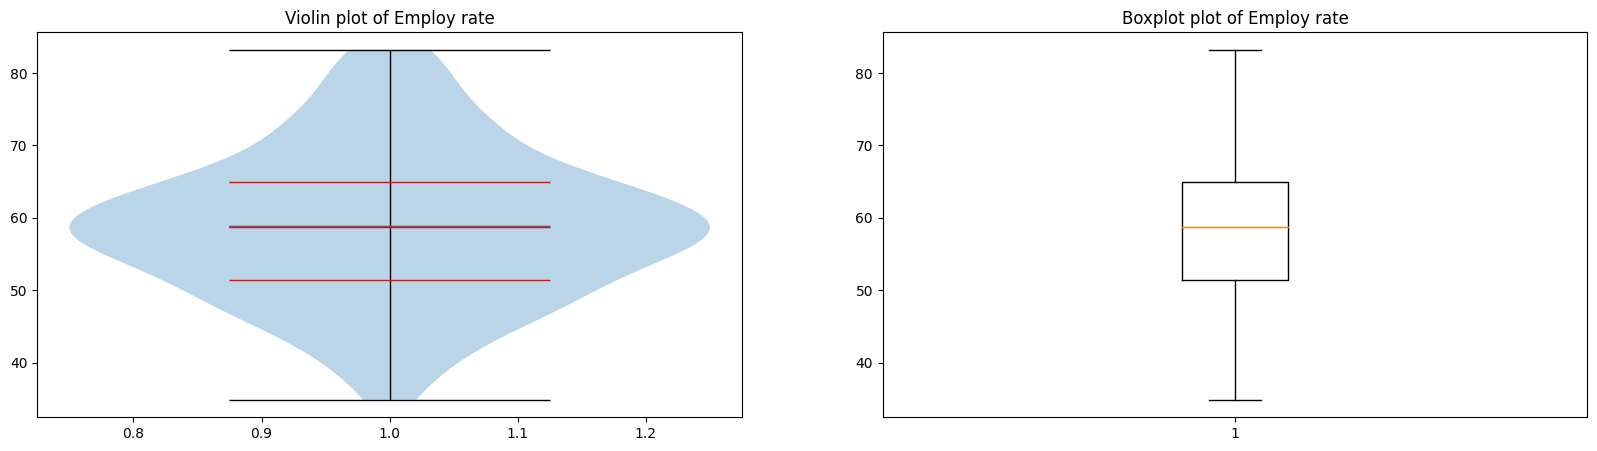

In [65]:
# Plotting a boxplot for Employ rate
sample=data_df[data_df["employrate"].isnull()==False]
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
violin=axs[0].violinplot(sample["employrate"], showmeans = True, showmedians = True, quantiles = [0.25, 0.5, 0.75])
axs[0].set_title("Violin plot of Employ rate")
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor("black")
    vp.set_linewidth(1)
vp=violin["cquantiles"]
vp.set_edgecolor("red")
vp.set_linewidth(1)
vp=violin["cmeans"]
vp.set_edgecolor("green")
vp.set_linewidth(1)
axs[1].boxplot(sample["employrate"])
axs[1].set_title("Boxplot plot of Employ rate")
plt.show()

$$
Análisis Urban rate
$$

In [66]:
data_df["urbanrate"].isnull().sum()

0

[]

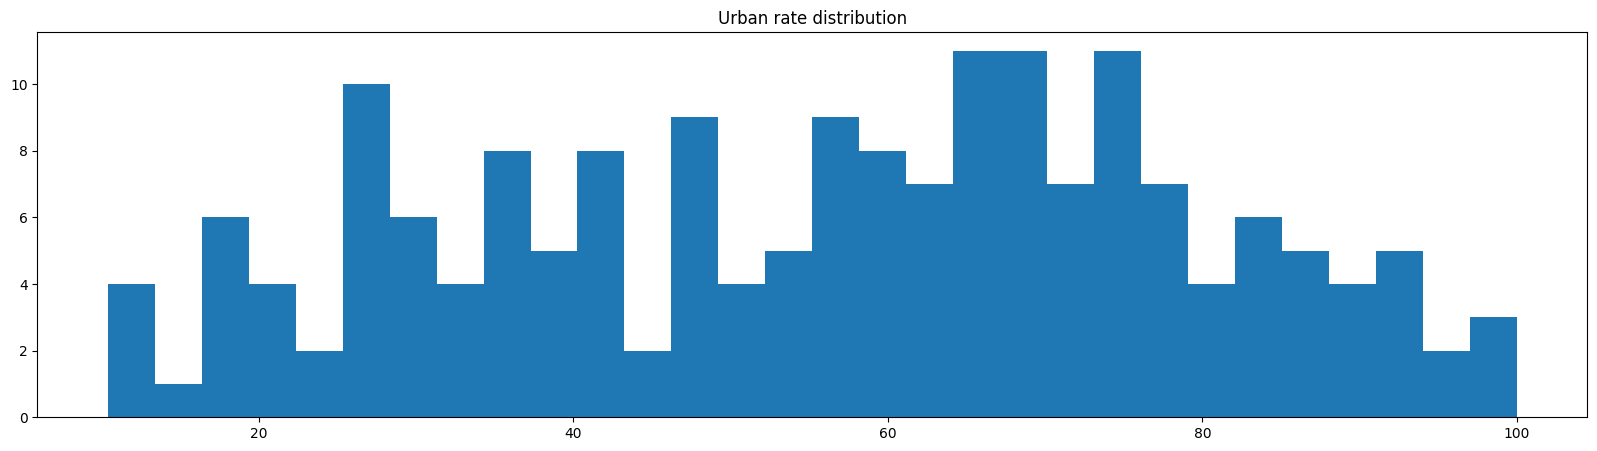

In [67]:
# Plotting a histogram for Urban rate
plt.figure(figsize=(20, 5))
plt.hist(data_df["urbanrate"], bins=30)
plt.title("Urban rate distribution")
plt.plot()

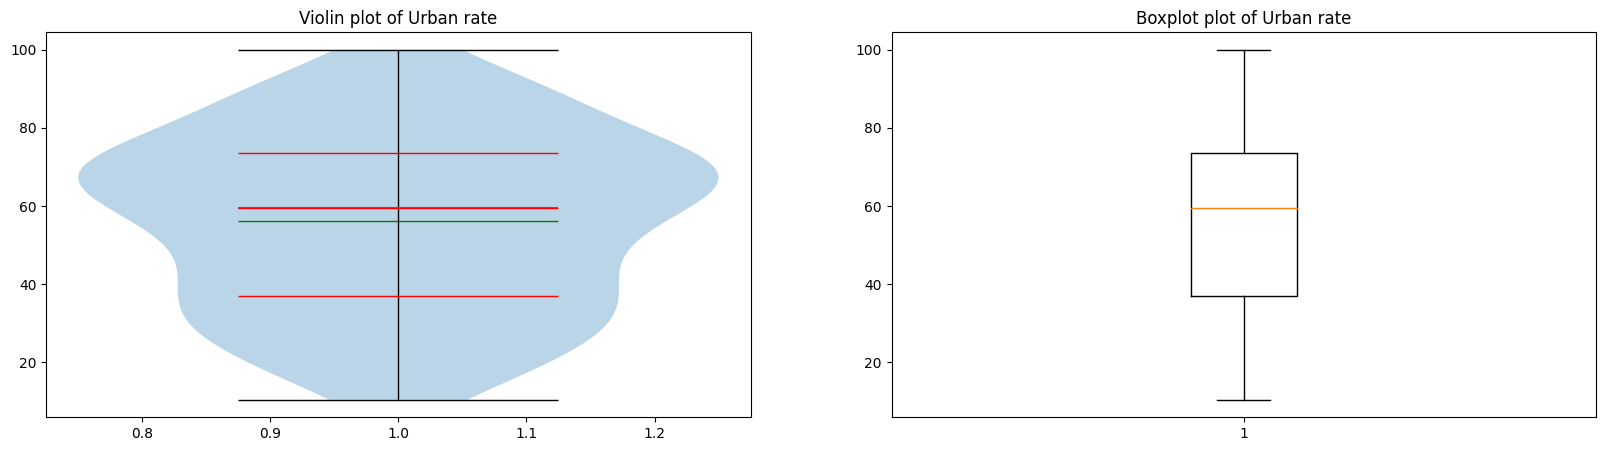

In [68]:
# Plotting a boxplot for Urban rate   
sample=data_df[data_df["urbanrate"].isnull()==False]
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
violin=axs[0].violinplot(sample["urbanrate"], showmeans = True, showmedians = True, quantiles = [0.25, 0.5, 0.75])
axs[0].set_title("Violin plot of Urban rate")
for partname in ('cbars', 'cmins', 'cmaxes'):
    vp = violin[partname]
    vp.set_edgecolor("black")
    vp.set_linewidth(1)
vp=violin["cquantiles"]
vp.set_edgecolor("red")
vp.set_linewidth(1)
vp=violin["cmeans"]
vp.set_edgecolor("green")
vp.set_linewidth(1)
axs[1].boxplot(sample["urbanrate"])
axs[1].set_title("Boxplot plot of Urban rate")
plt.show()     

## C) Análisis bivariado

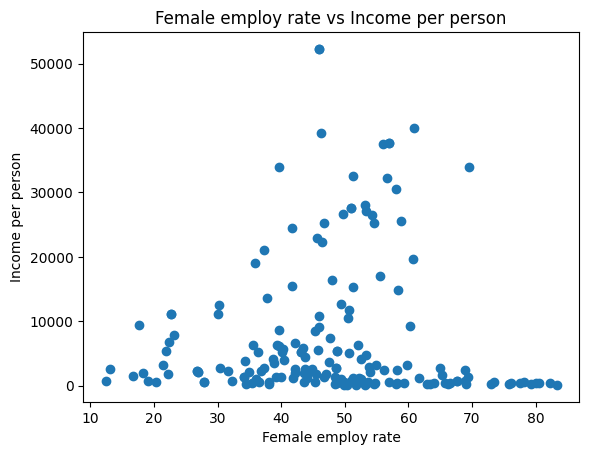

In [70]:
plt.scatter(data_df["femaleemployrate"],data_df["incomeperperson"])
plt.title("Female employ rate vs Income per person")
plt.xlabel("Female employ rate")
plt.ylabel("Income per person")
plt.show()

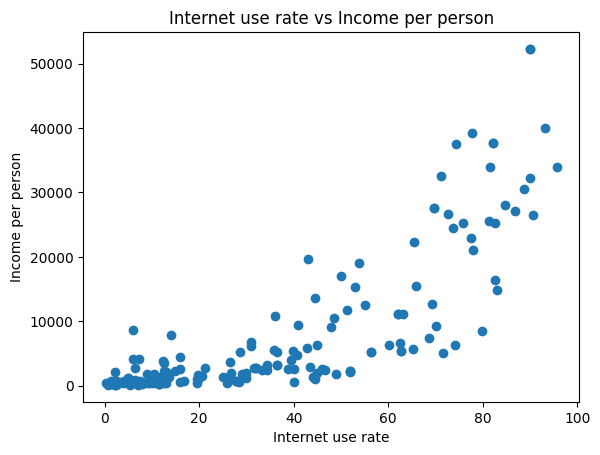

In [71]:
plt.scatter(data_df["internetuserate"],data_df["incomeperperson"])
plt.title("Internet use rate vs Income per person")
plt.xlabel("Internet use rate")
plt.ylabel("Income per person")
plt.show()

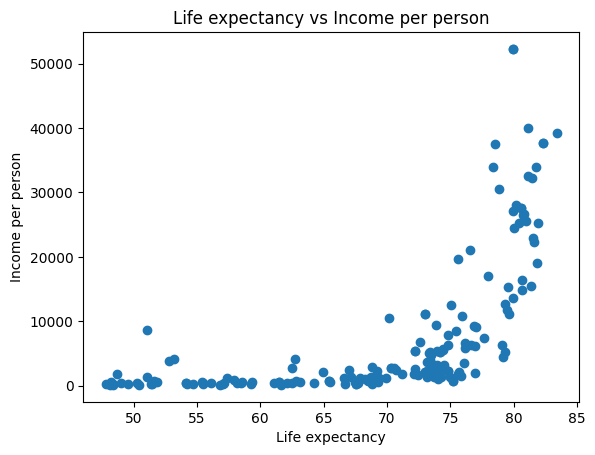

In [72]:
plt.scatter(data_df["lifeexpectancy"],data_df["incomeperperson"])
plt.title("Life expectancy vs Income per person")
plt.xlabel("Life expectancy")
plt.ylabel("Income per person")
plt.show()

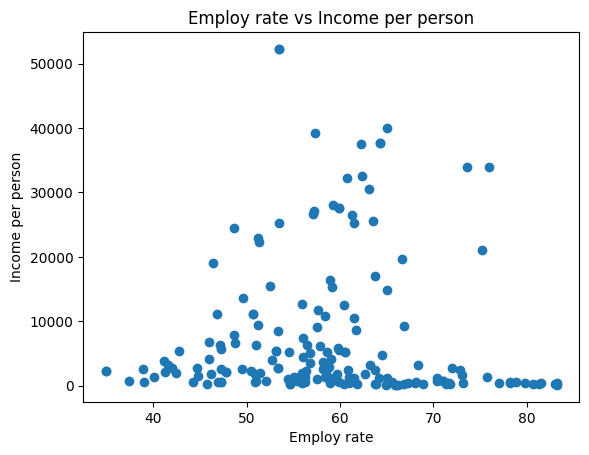

In [73]:
plt.scatter(data_df["employrate"],data_df["incomeperperson"])
plt.title("Employ rate vs Income per person")
plt.xlabel("Employ rate")
plt.ylabel("Income per person")
plt.show()

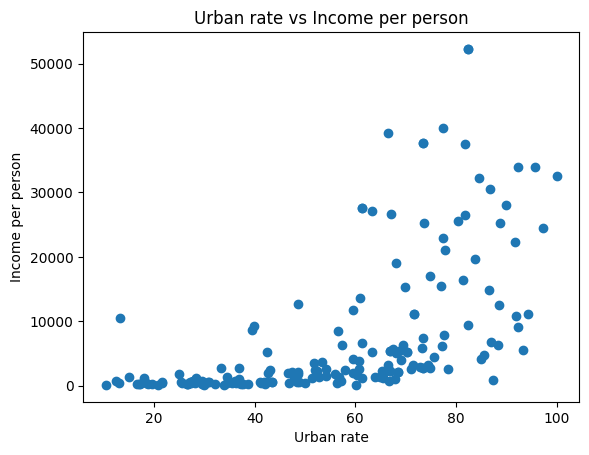

In [74]:
plt.scatter(data_df["urbanrate"],data_df["incomeperperson"])
plt.title("Urban rate vs Income per person")
plt.xlabel("Urban rate")
plt.ylabel("Income per person")
plt.show()

# Punto 2. Preparación de los datos

In [92]:
data_df[data_df["country"].duplicated()==True]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
32,Switzerland,37662.751250,11.41,0.524220,81.7,2.406741e+09,57.000000,0.4,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48
39,Oman,11191.811010,0.92,4.465998,13.2,4.879930e+08,22.600000,0.1,61.987413,72.974,NaN,-8.0,2124.608816,3.716739,50.700001,71.62
74,"Macedonia, FYR",2221.185664,8.94,2.101467,52.1,1.688830e+08,26.799999,NaN,51.914184,74.847,NaN,9.0,NaN,7.876878,34.900002,66.90
111,Sudan,523.950151,2.56,0.969499,22.5,2.250197e+08,27.900000,1.1,NaN,61.452,NaN,-4.0,50.892101,9.709556,47.299999,43.44
120,Malaysia,5184.709328,0.87,1.142127,30.8,2.670950e+09,43.099998,0.5,56.300034,74.221,0.890813,6.0,767.970324,8.211067,60.500000,70.36
124,Iran,2161.546510,1.03,2.026400,17.1,9.183548e+09,26.900000,0.2,13.000111,72.974,1.162576,-7.0,753.209802,6.021882,47.799999,68.46
143,Lithuania,5332.238591,16.30,1.487831,38.5,2.262553e+08,48.799999,0.1,62.811900,72.231,0.812369,10.0,758.858719,33.341860,53.099998,66.96
148,Belarus,2737.670379,18.85,3.711930,36.0,9.998743e+08,48.599998,0.3,32.052144,70.349,0.687828,-7.0,614.907287,26.874690,53.400002,73.46
149,Vietnam,722.807559,3.91,1.085367,16.2,1.425435e+09,67.599998,0.4,27.851822,75.181,NaN,-7.0,302.725655,11.653322,71.000000,27.84
155,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34


In [154]:
sample=data_df.drop_duplicates(subset=["country"])

In [155]:
sample[data_df["country"].duplicated()==True]

C:\Users\Angie\AppData\Local\Temp\ipykernel_5320\1139019600.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample[data_df["country"].duplicated()==True]


,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate


In [156]:
sample=sample[["country","incomeperperson","urbanrate","internetuserate"]]
sample

,country,incomeperperson,urbanrate,internetuserate
0,Ireland,27595.091350,61.34,69.770394
1,Albania,1914.996551,46.72,44.989947
2,Central African Rep.,239.518749,38.58,2.300027
3,Barbados,9243.587053,39.84,70.028599
4,Italy,18982.269290,68.08,53.740217
...,...,...,...,...
173,Mexico,6105.280743,77.20,31.050013
174,Mauritius,5182.143721,42.48,28.731883
175,Namibia,2667.246710,36.84,6.500823
176,Comoros,336.368749,28.08,5.098265


In [157]:
complementdata= pd.read_excel("G:\Mi unidad\Maestria Ing Información\Ciencia de datos aplicada\Taller 2\TallerPIBBancoMundial\complementdata.xlsx")

In [158]:
complementdata[complementdata["country"]=="Central African Rep."]

,country,employrate,democracy_index,femaleemployrate,gini,lifeexpectancy,genderschoolratio
26,Central African Rep.,69.5,18.2,62.1,40.1,47.8,56.9


In [159]:
# Creating a dictionary representing the valid countries

countries_list = list(sample[["country"]])

In [160]:
# Creating a function to fix the digitation errors for the "DIA" column.
def error_in_country_column(x):
    max=0
    c=""
    for country in countries_list:
      match_ratio=SequenceMatcher(None, country, x).ratio()
      if (match_ratio>max):
        c=country
        max=match_ratio

    return c

In [161]:
countries_list2 = list(complementdata[["country"]])
sample2=complementdata
for c in countries_list2:
  sample2= sample2.replace(to_replace=c, value=error_in_country_column(c))

sample2

,country,employrate,democracy_index,femaleemployrate,gini,lifeexpectancy,genderschoolratio
0,Afghanistan,42.2,24.8,12.90,37.7,60.5,22.6
1,Angola,70.0,33.2,67.50,38.2,60.2,70.5
2,Albania,46.6,58.6,38.50,29.5,78.1,101.0
3,UAE,81.8,25.2,41.70,52.0,70.8,105.0
4,Argentina,55.7,68.4,43.50,43.6,75.9,108.0
...,...,...,...,...,...,...,...
183,Samoa,41.5,NaN,29.50,34.1,69.6,106.0
184,Yemen,34.3,26.4,8.08,35.8,67.6,27.6
185,South Africa,39.5,77.9,32.80,37.4,57.1,103.0
186,Zambia,66.5,56.8,61.60,55.6,56.5,83.1


In [162]:
test=pd.merge(sample,sample2,on="country",how="left")
test

,country,incomeperperson,urbanrate,internetuserate,employrate,democracy_index,femaleemployrate,gini,lifeexpectancy,genderschoolratio
0,Ireland,27595.091350,61.34,69.770394,53.8,87.9,49.3,30.1,80.8,105.0
1,Albania,1914.996551,46.72,44.989947,46.6,58.6,38.5,29.5,78.1,101.0
2,Central African Rep.,239.518749,38.58,2.300027,69.5,18.2,62.1,40.1,47.8,56.9
3,Barbados,9243.587053,39.84,70.028599,60.2,NaN,56.3,54.5,76.2,108.0
4,Italy,18982.269290,68.08,53.740217,44.0,78.3,34.3,34.7,82.1,103.0
...,...,...,...,...,...,...,...,...,...,...
161,Mexico,6105.280743,77.20,31.050013,57.5,69.3,40.9,31.3,75.3,98.1
162,Mauritius,5182.143721,42.48,28.731883,53.9,80.4,37.5,31.2,74.2,98.2
163,Namibia,2667.246710,36.84,6.500823,44.8,62.3,40.0,60.6,60.9,105.0
164,Comoros,336.368749,28.08,5.098265,40.7,34.1,30.4,49.6,65.9,77.8


In [163]:
test.describe()

,incomeperperson,urbanrate,internetuserate,employrate,democracy_index,femaleemployrate,gini,lifeexpectancy,genderschoolratio
count,163.000000,166.000000,163.000000,156.000000,151.000000,156.000000,156.000000,156.000000,156.000000
mean,7202.019107,55.936506,33.652136,57.924359,54.858278,47.542308,41.214744,70.308974,89.746154
std,10469.295971,22.844257,27.933161,11.658752,22.205307,16.093112,9.963163,8.925335,20.527594
min,103.775857,10.400000,0.210066,33.400000,15.200000,10.300000,25.600000,32.500000,22.600000
25%,602.502870,36.840000,9.102256,49.800000,34.450000,40.475000,32.200000,63.300000,77.325000
50%,2344.896916,57.610000,28.731883,57.700000,58.400000,47.350000,40.000000,72.300000,99.950000
75%,8550.031767,73.475000,52.513403,65.375000,72.150000,57.425000,51.200000,76.550000,104.000000
max,52301.587180,100.000000,95.638113,87.000000,98.000000,83.200000,60.600000,83.300000,126.000000


In [164]:
df_data=test.dropna()

In [165]:
df_data.describe()

,incomeperperson,urbanrate,internetuserate,employrate,democracy_index,femaleemployrate,gini,lifeexpectancy,genderschoolratio
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,7123.200295,56.163151,32.941547,57.747945,55.705479,47.513699,41.073973,70.446575,90.078082
std,10650.276269,22.575480,27.785305,11.651025,22.015558,15.894699,10.037709,8.973687,19.970290
min,103.775857,10.400000,0.210066,33.400000,15.200000,10.300000,25.600000,32.500000,32.300000
25%,599.188702,37.650000,8.576849,49.600000,34.750000,40.600000,32.200000,63.350000,77.800000
50%,2288.445126,58.700000,28.140927,57.500000,58.800000,46.950000,39.750000,72.300000,100.000000
75%,7600.754186,73.110000,51.821665,65.175000,72.350000,57.325000,51.200000,76.775000,104.000000
max,52301.587180,100.000000,95.638113,87.000000,98.000000,83.200000,60.600000,83.300000,126.000000


Consideraciones de calidad de datos:
1. Se identifico que habian valores duplicados en el archivo dado, por esta razón estos son removidos del set de estudio
2. De acuerdo con el dictionario de datos dado, habian variables con diferentes temporalidades (2010, 2011, 2007). Por esta razón se toma como referencia el año de la variable objetivo (2010-Income per person) y las variables con fechas diferentes son reemplazadas por los datos del año en análisis. 
3. Se agregan al análisis variables como democracy_index, indice gini, y el ratio entre mujeres y hombres con estudio de colegio (primaria y secundaria).Para la unificación de los dos archivos se estandarizan los nombres del país a partir de la función SequenceMatcher
4. Se eliminan las filas con datos faltantes, para no generar ningún sesgo de datos
5. Se vuelven a generar las gráficas del análisis multivariado

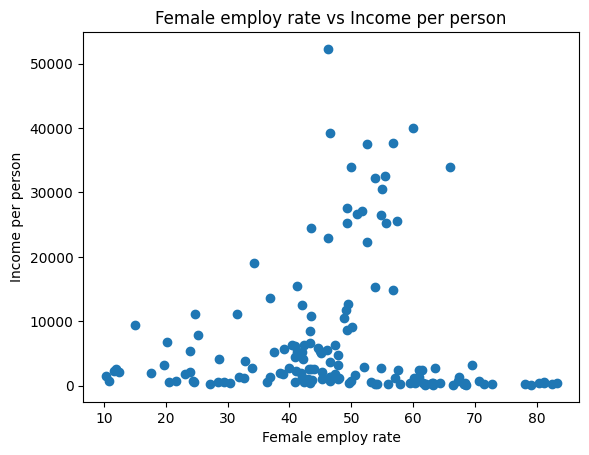

In [151]:
plt.scatter(df_data["femaleemployrate"],df_data["incomeperperson"])
plt.title("Female employ rate vs Income per person")
plt.xlabel("Female employ rate")
plt.ylabel("Income per person")
plt.show()

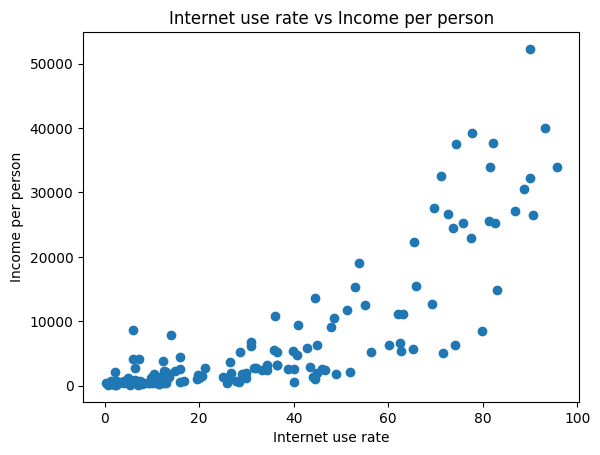

In [166]:
plt.scatter(df_data["internetuserate"],df_data["incomeperperson"])
plt.title("Internet use rate vs Income per person")
plt.xlabel("Internet use rate")
plt.ylabel("Income per person")
plt.show()

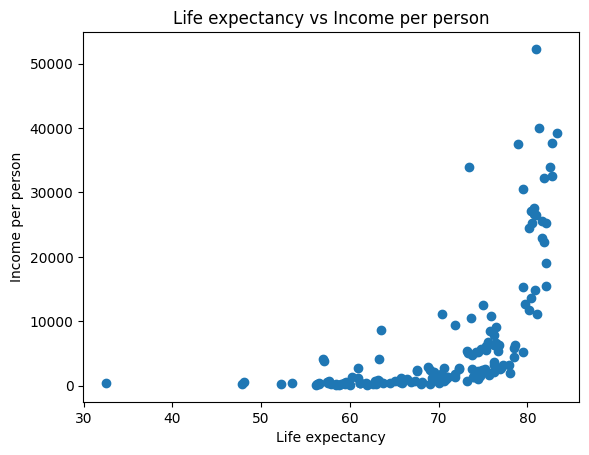

In [167]:
plt.scatter(df_data["lifeexpectancy"],df_data["incomeperperson"])
plt.title("Life expectancy vs Income per person")
plt.xlabel("Life expectancy")
plt.ylabel("Income per person")
plt.show()

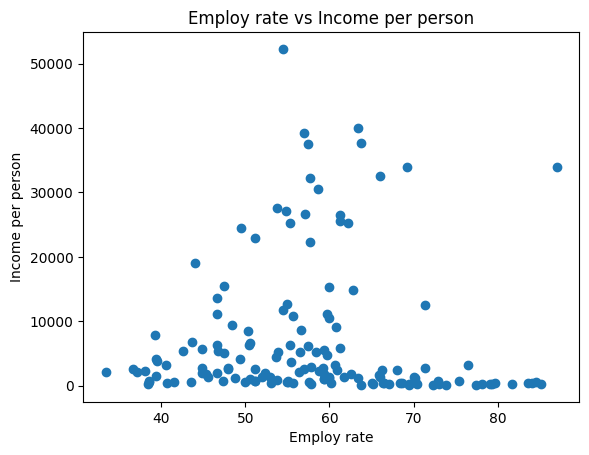

In [168]:
plt.scatter(df_data["employrate"],df_data["incomeperperson"])
plt.title("Employ rate vs Income per person")
plt.xlabel("Employ rate")
plt.ylabel("Income per person")
plt.show()

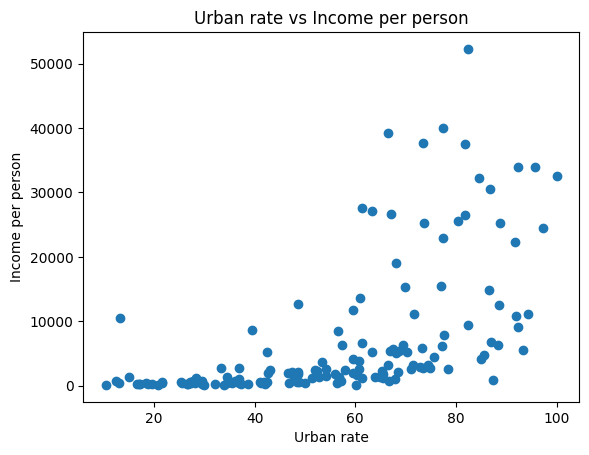

In [169]:
plt.scatter(df_data["urbanrate"],df_data["incomeperperson"])
plt.title("Urban rate vs Income per person")
plt.xlabel("Urban rate")
plt.ylabel("Income per person")
plt.show()

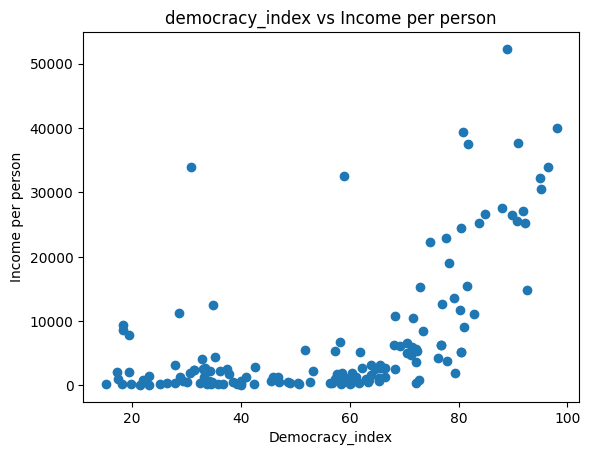

In [170]:
plt.scatter(df_data["democracy_index"],df_data["incomeperperson"])
plt.title("democracy_index vs Income per person")
plt.xlabel("Democracy_index")
plt.ylabel("Income per person")
plt.show()

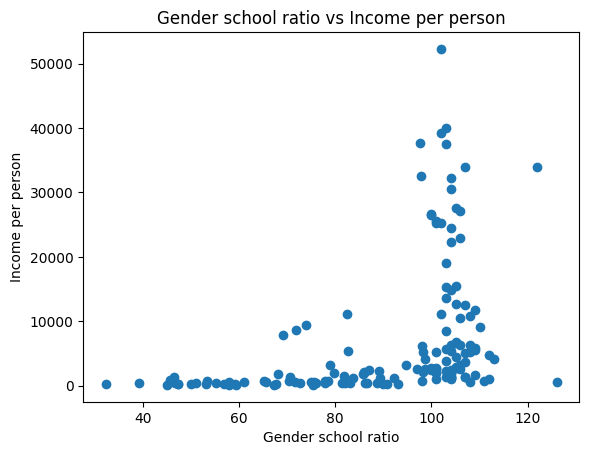

In [171]:
plt.scatter(df_data["genderschoolratio"],df_data["incomeperperson"])
plt.title("Gender school ratio vs Income per person")
plt.xlabel("Gender school ratio")
plt.ylabel("Income per person")
plt.show()

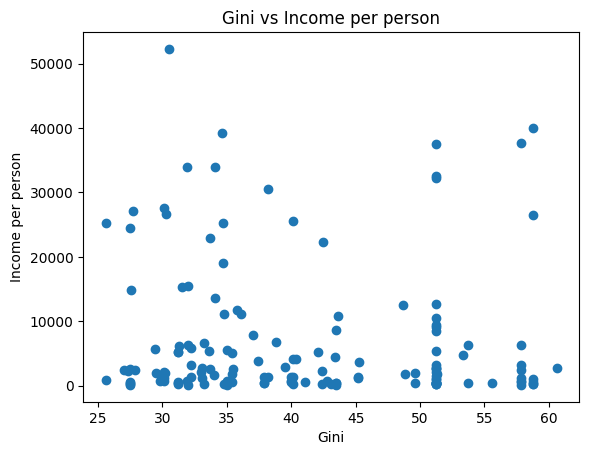

In [172]:
plt.scatter(df_data["gini"],df_data["incomeperperson"])
plt.title("Gini vs Income per person")
plt.xlabel("Gini")
plt.ylabel("Income per person")
plt.show()

In [173]:
#Se elimina la variable de indice de Gini ya que no se observa que haya una tendencia en su valor
del df_data["gini"]

In [178]:
#Se elimina el país
del df_data["country"]

In [179]:
df_data.describe()

,incomeperperson,urbanrate,internetuserate,employrate,democracy_index,femaleemployrate,lifeexpectancy,genderschoolratio
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,7123.200295,56.163151,32.941547,57.747945,55.705479,47.513699,70.446575,90.078082
std,10650.276269,22.575480,27.785305,11.651025,22.015558,15.894699,8.973687,19.970290
min,103.775857,10.400000,0.210066,33.400000,15.200000,10.300000,32.500000,32.300000
25%,599.188702,37.650000,8.576849,49.600000,34.750000,40.600000,63.350000,77.800000
50%,2288.445126,58.700000,28.140927,57.500000,58.800000,46.950000,72.300000,100.000000
75%,7600.754186,73.110000,51.821665,65.175000,72.350000,57.325000,76.775000,104.000000
max,52301.587180,100.000000,95.638113,87.000000,98.000000,83.200000,83.300000,126.000000


In [180]:
plt.figure(figsize=(12, 10))
df_data.corr()

,incomeperperson,urbanrate,internetuserate,employrate,democracy_index,femaleemployrate,lifeexpectancy,genderschoolratio
incomeperperson,1.000000,0.564957,0.812533,-0.005028,0.585589,0.033468,0.603412,0.389579
urbanrate,0.564957,1.000000,0.657247,-0.288418,0.383576,-0.305126,0.620633,0.512023
internetuserate,0.812533,0.657247,1.000000,-0.169643,0.652521,-0.092415,0.750819,0.582535
employrate,-0.005028,-0.288418,-0.169643,1.000000,-0.117244,0.884613,-0.284268,-0.250122
democracy_index,0.585589,0.383576,0.652521,-0.117244,1.000000,0.029939,0.574790,0.540173
femaleemployrate,0.033468,-0.305126,-0.092415,0.884613,0.029939,1.000000,-0.291473,-0.198798
lifeexpectancy,0.603412,0.620633,0.750819,-0.284268,0.574790,-0.291473,1.000000,0.577443
genderschoolratio,0.389579,0.512023,0.582535,-0.250122,0.540173,-0.198798,0.577443,1.000000


<Figure size 1200x1000 with 0 Axes>

<Axes: >

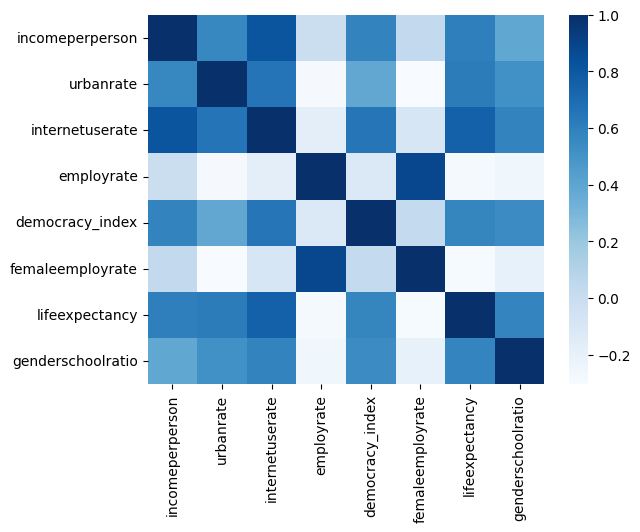

In [181]:
sns.heatmap(df_data.corr(), cmap="Blues")

# Punto 3. Entrenamiento del modelo de regresión

In [183]:
target=["incomeperperson"]
features=["urbanrate","internetuserate","employrate","democracy_index","femaleemployrate","lifeexpectancy","genderschoolratio"]

Particionamiento del conjunto de datos en entrenamiento y prueba

In [184]:
X_train, X_test, y_train, y_test = train_test_split(df_data[features], df_data[target], test_size=0.3, random_state=1)

In [185]:
X_train.shape, y_train.shape

((102, 7), (102, 1))

In [186]:
X_test.shape, y_test.shape

((44, 7), (44, 1))

Entrenamiento de un primer modelo de regresión lineal

In [187]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Interpretación de los coeficientes y del intercepto

In [225]:
model_summary=pd.DataFrame({"columns": regression.feature_names_in_, "coef": list(regression.coef_[0])})
model_summary

,columns,coef
0,urbanrate,69.149069
1,internetuserate,271.623636
2,employrate,198.834096
3,democracy_index,114.705926
4,femaleemployrate,-56.437238
5,lifeexpectancy,20.841727
6,genderschoolratio,-106.672891


In [189]:
regression.intercept_

array([-12759.49000568])

In [229]:
regression.coef_[0][1]

271.62363649166434

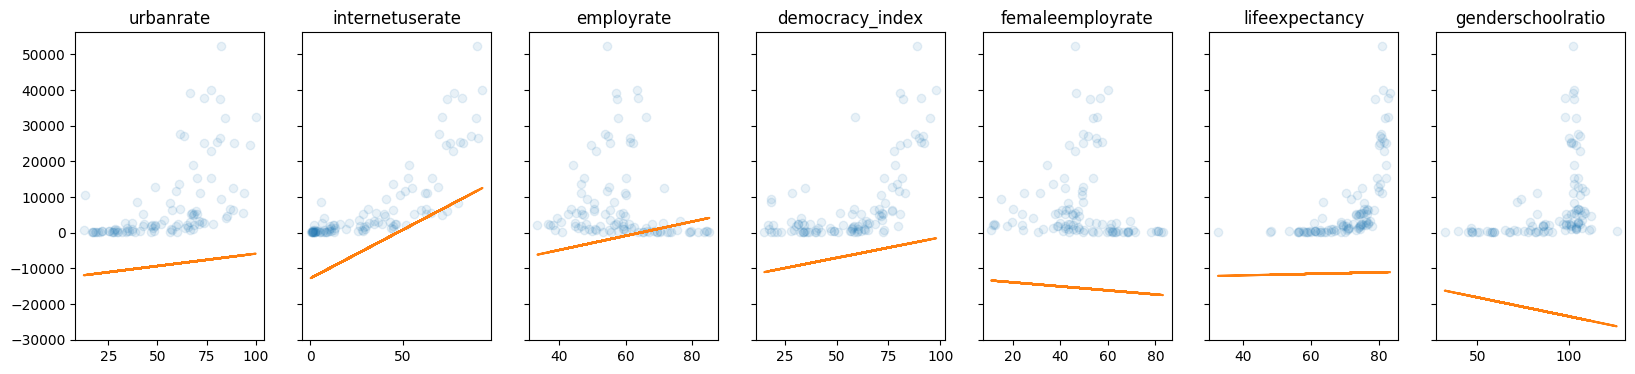

In [230]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[0][i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [233]:
regression.score(X_test,y_test)

0.7388346956114766

In [232]:
print("Mean Absolute Error (MAE)")
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))
print("Root Mean Squeared Error (RMSE)")
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Mean Absolute Error (MAE)
Train: 4515.703381562991
Test: 3813.385093499425
Root Mean Squeared Error (RMSE)
Train: 6201.310867619962
Test: 4668.431202532096


Entrenamiento de un segundo modelo de regresión lineal escalando las variables

In [234]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [235]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [237]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_[0]})

,columns,coef
0,urbanrate,1567.514252
1,internetuserate,7740.730130
2,employrate,2345.699050
3,democracy_index,2535.258301
4,femaleemployrate,-915.209894
5,lifeexpectancy,193.347732
6,genderschoolratio,-2155.231378


In [244]:

y_train.mean(), y_test.mean()

(incomeperperson    7709.252697
 dtype: float64,
 incomeperperson    5764.624271
 dtype: float64)

In [245]:
print("R2:")
print(pipeline.score(X_test,y_test))
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

R2:
0.7388346956114766
MAE:
Train: 4515.703381562991
Test: 3813.3850934994234

RMSE:
Train: 6201.310867619962
Test: 4668.431202532095


Entrenamiento de un tercer modelo de regresión lineal escalando las variables y el target

In [246]:
pipeline = Pipeline(
    [
        ("scaler_x", StandardScaler()),
        ("scaler_y", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [247]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler_x', StandardScaler()), ('scaler_y', StandardScaler()),
                ('model', LinearRegression())])

In [248]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_[0]})

,columns,coef
0,urbanrate,1567.514252
1,internetuserate,7740.730130
2,employrate,2345.699050
3,democracy_index,2535.258301
4,femaleemployrate,-915.209894
5,lifeexpectancy,193.347732
6,genderschoolratio,-2155.231378


In [249]:
print("R2:")
print(pipeline.score(X_test,y_test))
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

R2:
0.7388346956114767
MAE:
Train: 4515.703381562991
Test: 3813.3850934994257

RMSE:
Train: 6201.310867619963
Test: 4668.431202532095


Entrenamiento de un cuarto modelo de regresión lineal escalando las variables y el target

In [ ]:
pipeline = Pipeline(
    [
        ("scaler_x", StandardScaler()),
        ("scaler_y", StandardScaler()),
        ("model", LinearRegression())
    ]
)